<a href="https://colab.research.google.com/github/Mamtajangra/CNN_on-fashion-mnist-dataset-via-pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

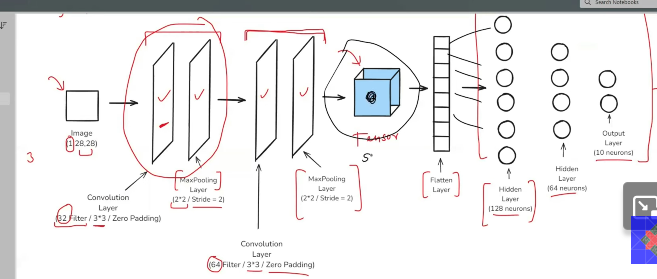

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset,DataLoader

In [50]:
torch.manual_seed(42)

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "CPU")
print(f"device:{device}")

device:cuda


In [81]:
df = pd.read_csv("/content/fashion-mnist_train.csv")
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [83]:
df.tail(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [85]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


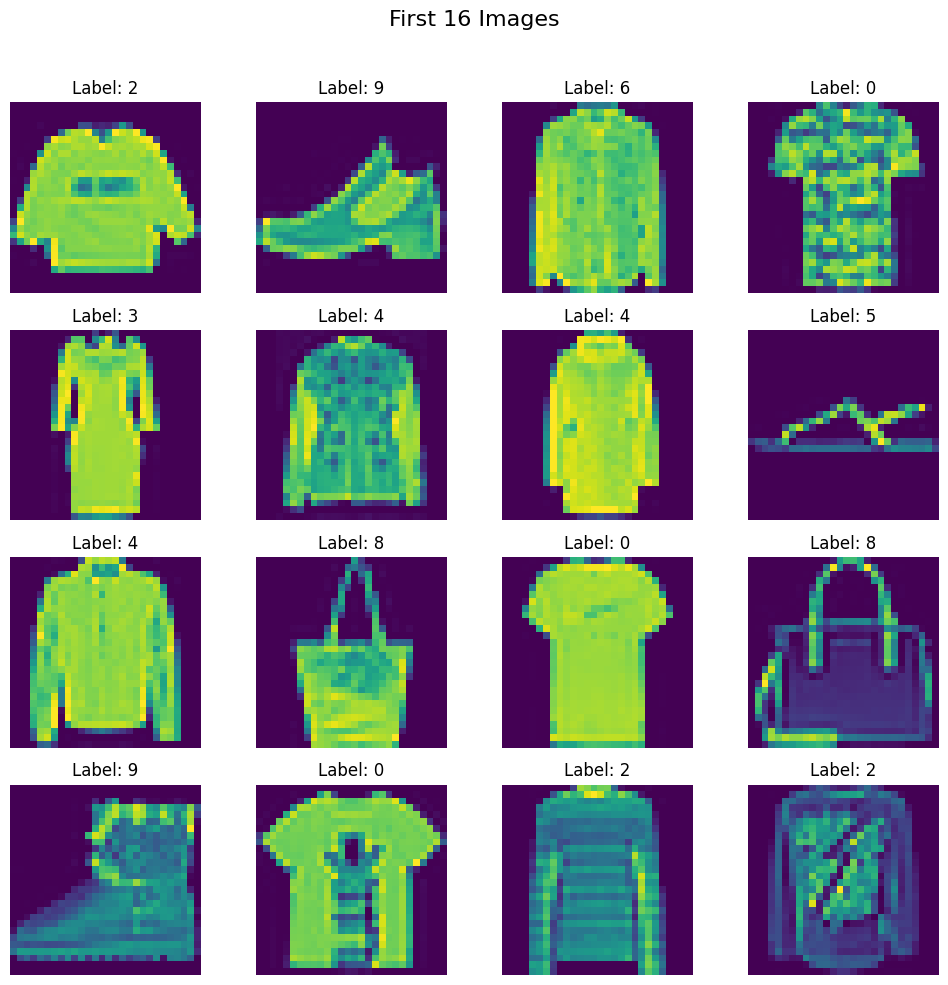

In [86]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [87]:
df.isnull().sum()

,0
label,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [88]:
df = df.fillna(df.mean(numeric_only = True))

In [89]:
df.isnull().sum()

,0
label,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [90]:
# X = df.iloc[:,1:].values
# y = df.iloc[:,0].values   yahan shape mismatch ho gyi thi to uske liye hmne drop wala use kiya

In [91]:
X = df.drop("label", axis=1).values   # features
y = df["label"].values                # labels
print(X.shape, y.shape)  # yahan dono ka rows same hone chahiye


(60000, 784) (60000,)


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% validation
    random_state=42,
    stratify=y           # classification ke liye best practice
)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)


X_train: (48000, 784)
y_train: (48000,)
X_val: (12000, 784)
y_val: (12000,)


In [104]:
train_dataset = CustomDataset(X_train, y_train)
val_dataset   = CustomDataset(X_val, y_val)


In [106]:
n = len(y_train)          # 12000
X_train = X_train[:n]     # sirf pehli 12000 rows li

print(len(X_train), len(y_train))  # dono 12000 hone chahiye

train_dataset = CustomDataset(X_train, y_train)



48000 48000


In [92]:
# X_train,X_test,y_test,y_train = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [93]:
# X_train = X_train/255.0
# y_train = y_train/255.0

In [94]:
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("len(X_train):", len(X_train))
# print("len(y_train):", len(y_train))


X_train shape: (48000, 784)
y_train shape: (12000,)
len(X_train): 48000
len(y_train): 12000


In [107]:
class CustomDataset(Dataset):
  def __init__(self,features,labels):

      self.features = torch.tensor(features,dtype = torch.float32).reshape(-1,1,28,28) ## here 1 = channel(grayscale),28= width,28 = height,-1 = placeholder(batch size)
      ##'''kyunki hmko chahiye 2 d main pehle to ye dataset memory se 1,1 row laa rha tha but image to 2d hoti h isliye reshape kiya

      self.labels = torch.tensor(labels,dtype = torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return  self.features[index], self.labels[index]


In [108]:
train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)


In [109]:
train_dataLoader = DataLoader(train_dataset,batch_size = 32,shuffle = True,pin_memory = True)
test_dataLoader = DataLoader(test_dataset,batch_size = 32,shuffle = False,pin_memory = True)

In [110]:
len(train_dataLoader)

1500

In [ ]:
# '''CNN main 2 layers main kaam hoga feature extraction and classifier ka again fir  unke beech ki layers ko add krenge hmm yaha like convolution and pooling
#  fir convolutional layer main input feature honge,batch_size hoga 32 and 3*3 kernel size  honge padding zero hoga iska mtlb hai ki operation ke baad bhi image same size ka reh jaayega'''


# class MyNN(nn.Module):
#   def __init__(self,input_features):
#     super(). __init__()

#     self.features = nn.Sequential(
#           nn.Conv2d(input_features,32,kernel_size = 3,padding = "same"),## ye hogi convolutional layer isse next hai activation function
#           nn.ReLU(),
#           nn.BatchNorm2d(32),
#           nn.MaxPool2d(kernel_size = 2,stride = 2), ## pooling layer
#     ## ye second layer hai isme jo first wali ka output 32 tha wo iput ho gaya iska
#           nn.Conv2d(32,64,kernel_size = 3,padding = "same"),## ye hogi convolutional layer isse next hai activation function
#           nn.ReLU(),
#           nn.BatchNorm2d(64),
#           nn.MaxPool2d(kernel_size = 2,stride = 2)
#     )
#                   ## classifier main sabse pehle tensor ko flat karenge
# '''hamko pta chalega ki neuron kitne hai kyunki yahan pe kaam ann kar raha hai uske liye firstly hmm derhe the (1,28,28)
#   first convolution main 32 tha batch size to ye hua ab (32,28,28)
#   pooling main kerneel 2*2 tha to hua (32,14,14)
#   next convo main tha 64 to hua (64,14,14)
#   again pooling layer kernel size hai 2*2 main hua (64,7,7)'''

# self.classifier = nn.Sequential(
#         nn.Flatten(),
#         nn.Linear(64*7*7,128),
#         nn.ReLU(),
#         nn.Dropout(p = 0.4),

#               nn.Linear(128,64),
#               nn.ReLU(),
#               nn.Dropout(p = 0.4),

#               nn.Linear(64,10)

#     )

# def forward_pass(self,x):
#      x = self.features(x)
#      x = self.classifier(x)

#      return x

In [111]:
class MyNN(nn.Module):
    def __init__(self, input_features):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(input_features, 32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)

        return x

In [112]:
learning_rate = 0.1
epochs = 100

In [113]:
model = MyNN(1)

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

In [114]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_dataLoader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_dataLoader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.5730267678499221
Epoch: 2 , Loss: 0.3995592972834905
Epoch: 3 , Loss: 0.3470566290318966
Epoch: 4 , Loss: 0.3057403935516874
Epoch: 5 , Loss: 0.27754421485215425
Epoch: 6 , Loss: 0.25760554091632365
Epoch: 7 , Loss: 0.23969438311395547
Epoch: 8 , Loss: 0.22536213789135218
Epoch: 9 , Loss: 0.21015445809128383
Epoch: 10 , Loss: 0.1972968236412853
Epoch: 11 , Loss: 0.18668895991581183
Epoch: 12 , Loss: 0.18118850475363432
Epoch: 13 , Loss: 0.17390495404337222
Epoch: 14 , Loss: 0.16708504367278268
Epoch: 15 , Loss: 0.15859352582413702
Epoch: 16 , Loss: 0.15160757912850628
Epoch: 17 , Loss: 0.1493576788166538
Epoch: 18 , Loss: 0.14401049222859244
Epoch: 19 , Loss: 0.1423157219075753
Epoch: 20 , Loss: 0.1371999993805463
Epoch: 21 , Loss: 0.1334298906060867
Epoch: 22 , Loss: 0.12850307120607857
Epoch: 23 , Loss: 0.12363792535367732
Epoch: 24 , Loss: 0.11416543284392294
Epoch: 25 , Loss: 0.11846075888435977
Epoch: 26 , Loss: 0.11615501266151357
Epoch: 27 , Loss: 0.1133179275

In [115]:
model.eval()

MyNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [117]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_dataLoader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.10225


In [119]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_dataLoader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.9948958333333333
